In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PLSI:
    def __init__(self, n_topics, max_iter=100, tol=1e-4, random_state=None):
        self.n_topics = n_topics
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        """
        X: document-word matrix (docs x words)
        """
        np.random.seed(self.random_state)
        n_docs, n_words = X.shape

        # Initialize parameters
        self.P_w_z = np.random.rand(self.n_topics, n_words)
        self.P_w_z /= self.P_w_z.sum(axis=1, keepdims=True)

        self.P_z_d = np.random.rand(n_docs, self.n_topics)
        self.P_z_d /= self.P_z_d.sum(axis=1, keepdims=True)

        prev_likelihood = -np.inf
        self.likelihoods = []

        for iteration in range(self.max_iter):
            # E-step: Compute P(z|d,w)
            P_z_dw = np.zeros((n_docs, n_words, self.n_topics))
            for z in range(self.n_topics):
                P_z_dw[:, :, z] = self.P_z_d[:, [z]] * self.P_w_z[[z], :]

            P_z_dw /= P_z_dw.sum(axis=2, keepdims=True) + 1e-12

            # M-step
            # Update P(w|z)
            for z in range(self.n_topics):
                numerator = (X * P_z_dw[:, :, z]).sum(axis=0)
                self.P_w_z[z, :] = numerator / (numerator.sum() + 1e-12)

            # Update P(z|d)
            for d in range(n_docs):
                numerator = (X[d, :, None] * P_z_dw[d, :, :]).sum(axis=0)
                self.P_z_d[d, :] = numerator / (numerator.sum() + 1e-12)

            # Compute log-likelihood
            Pw_d = np.zeros((n_docs, n_words))
            for z in range(self.n_topics):
                Pw_d += self.P_z_d[:, [z]] * self.P_w_z[[z], :]

            likelihood = np.sum(X * np.log(Pw_d + 1e-12))
            self.likelihoods.append(likelihood)

            if np.abs(likelihood - prev_likelihood) < self.tol:
                print(f"✅ Converged at iteration {iteration}")
                break

            prev_likelihood = likelihood

            if iteration % 5 == 0 or iteration == self.max_iter - 1:
                print(f"Iteration {iteration}, log-likelihood: {likelihood:.4f}")

        print("Training complete.")
        return self


    def plot_likelihood(self):
        """Plot log-likelihood over iterations"""
        plt.figure(figsize=(6, 4))
        plt.plot(self.likelihoods, marker='o')
        plt.title("Log-Likelihood vs Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Log-Likelihood")
        plt.grid(True)
        plt.show()

    def plot_doc_topics(self):
        """Visualize P(z|d) as bar chart"""
        plt.figure(figsize=(8, 5))
        for d in range(self.P_z_d.shape[0]):
            plt.bar(np.arange(self.n_topics) + d*(self.n_topics + 0.5),
                    self.P_z_d[d], label=f'Doc {d+1}')
        plt.title("Topic Distribution per Document")
        plt.xlabel("Topic index (offset per doc)")
        plt.ylabel("P(z|d)")
        plt.legend()
        plt.show()

    def plot_word_topics(self, vocab=None):
        """Visualize top words in each topic as heatmap"""
        plt.figure(figsize=(10, 6))
        plt.imshow(self.P_w_z, aspect='auto', cmap='viridis')
        plt.colorbar(label='P(w|z)')
        plt.title("Word Distribution per Topic")
        plt.xlabel("Words" if vocab is None else "Vocabulary")
        plt.ylabel("Topics")
        if vocab is not None:
            plt.xticks(np.arange(len(vocab)), vocab, rotation=90)
        plt.tight_layout()
        plt.show()

    def topic_words(self, n_top_words=10, vocab=None):
        for i in range(self.n_topics):
            top_idx = np.argsort(self.P_w_z[i, :])[::-1][:n_top_words]
            words = [vocab[j] if vocab is not None else str(j) for j in top_idx]
            print(f"Topic {i+1}: {' '.join(words)}")


Iteration 0, log-likelihood: -14.6158
Iteration 5, log-likelihood: -13.2684
Iteration 10, log-likelihood: -12.8232
Iteration 15, log-likelihood: -12.7604
Iteration 20, log-likelihood: -12.7501
Iteration 25, log-likelihood: -12.7481
✅ Converged at iteration 28
Training complete.

Top words per topic:
Topic 1: dogs document animals cats
Topic 2: cats document dogs animals


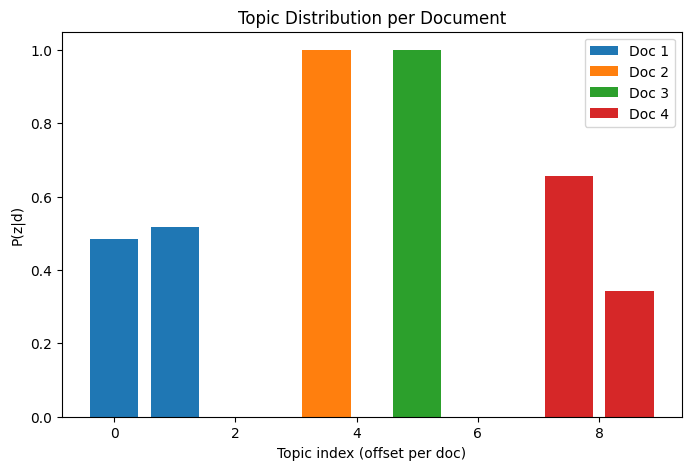

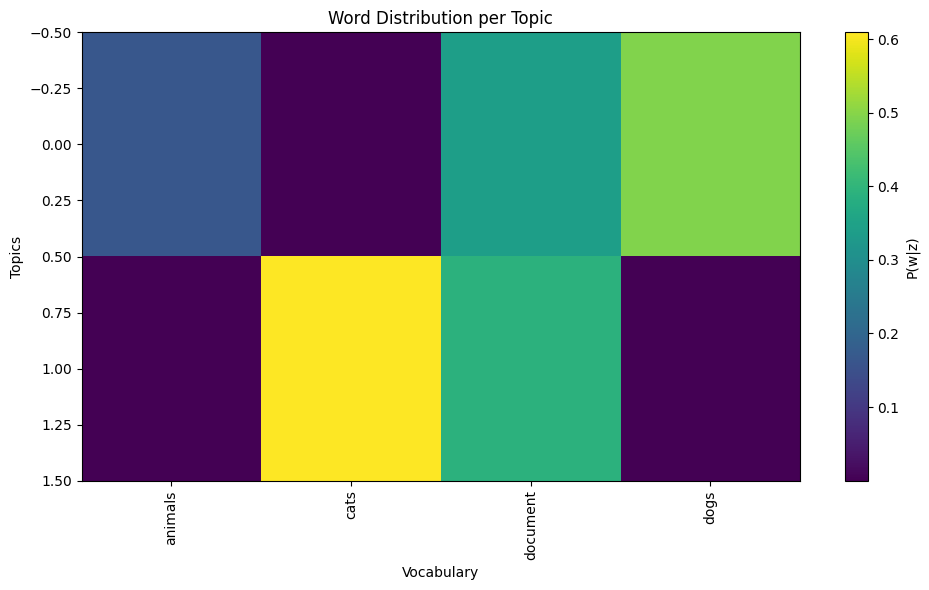

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

class PLSI:
    def __init__(self, n_topics, max_iter=100, tol=1e-4, random_state=None):
        self.n_topics = n_topics
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        """
        X: document-word matrix (docs x words)
        """
        np.random.seed(self.random_state)
        n_docs, n_words = X.shape

        # Initialize parameters
        self.P_w_z = np.random.rand(self.n_topics, n_words)
        self.P_w_z /= self.P_w_z.sum(axis=1, keepdims=True)

        self.P_z_d = np.random.rand(n_docs, self.n_topics)
        self.P_z_d /= self.P_z_d.sum(axis=1, keepdims=True)

        prev_likelihood = -np.inf
        self.likelihoods = []

        for iteration in range(self.max_iter):
            # E-step: Compute P(z|d,w)
            P_z_dw = np.zeros((n_docs, n_words, self.n_topics))
            for z in range(self.n_topics):
                P_z_dw[:, :, z] = self.P_z_d[:, [z]] * self.P_w_z[[z], :]

            P_z_dw /= P_z_dw.sum(axis=2, keepdims=True) + 1e-12

            # M-step
            # Update P(w|z)
            for z in range(self.n_topics):
                numerator = (X * P_z_dw[:, :, z]).sum(axis=0)
                self.P_w_z[z, :] = numerator / (numerator.sum() + 1e-12)

            # Update P(z|d)
            for d in range(n_docs):
                numerator = (X[d, :, None] * P_z_dw[d, :, :]).sum(axis=0)
                self.P_z_d[d, :] = numerator / (numerator.sum() + 1e-12)

            # Compute log-likelihood
            Pw_d = np.zeros((n_docs, n_words))
            for z in range(self.n_topics):
                Pw_d += self.P_z_d[:, [z]] * self.P_w_z[[z], :]

            likelihood = np.sum(X * np.log(Pw_d + 1e-12))
            self.likelihoods.append(likelihood)

            if np.abs(likelihood - prev_likelihood) < self.tol:
                print(f"✅ Converged at iteration {iteration}")
                break

            prev_likelihood = likelihood

            if iteration % 5 == 0 or iteration == self.max_iter - 1:
                print(f"Iteration {iteration}, log-likelihood: {likelihood:.4f}")

        print("Training complete.")
        return self


    def plot_likelihood(self):
        """Plot log-likelihood over iterations"""
        plt.figure(figsize=(6, 4))
        plt.plot(self.likelihoods, marker='o')
        plt.title("Log-Likelihood vs Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Log-Likelihood")
        plt.grid(True)
        plt.show()

    def plot_doc_topics(self):
        """Visualize P(z|d) as bar chart"""
        plt.figure(figsize=(8, 5))
        for d in range(self.P_z_d.shape[0]):
            plt.bar(np.arange(self.n_topics) + d*(self.n_topics + 0.5),
                    self.P_z_d[d], label=f'Doc {d+1}')
        plt.title("Topic Distribution per Document")
        plt.xlabel("Topic index (offset per doc)")
        plt.ylabel("P(z|d)")
        plt.legend()
        plt.show()

    def plot_word_topics(self, vocab=None):
        """Visualize top words in each topic as heatmap"""
        plt.figure(figsize=(10, 6))
        plt.imshow(self.P_w_z, aspect='auto', cmap='viridis')
        plt.colorbar(label='P(w|z)')
        plt.title("Word Distribution per Topic")
        plt.xlabel("Words" if vocab is None else "Vocabulary")
        plt.ylabel("Topics")
        if vocab is not None:
            plt.xticks(np.arange(len(vocab)), vocab, rotation=90)
        plt.tight_layout()
        plt.show()

    def topic_words(self, n_top_words=10, vocab=None):
        for i in range(self.n_topics):
            top_idx = np.argsort(self.P_w_z[i, :])[::-1][:n_top_words]
            words = [vocab[j] if vocab is not None else str(j) for j in top_idx]
            print(f"Topic {i+1}: {' '.join(words)}")


docs = [
    "This is the first document about cats and dogs.",
    "This document is about cats.",
    "This document is about dogs.",
    "This document is about cats and dogs and animals.",
]
# ===============================================


# Create document-word matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(docs).toarray()
vocab = vectorizer.get_feature_names_out()

# Train pLSI
plsi = PLSI(n_topics=2, max_iter=100, random_state=42)
plsi.fit(X)

# Show results
print("\nTop words per topic:")
plsi.topic_words(n_top_words=8, vocab=vocab)


# Plots
# plsi.plot_likelihood() # Removed as requested
plsi.plot_doc_topics()
plsi.plot_word_topics(vocab=vocab)

In [ ]:
class PLSI3Way:
    def __init__(self, n_users, n_docs, n_words, n_topics, max_iter=100, tol=1e-4, random_state=None):
        self.n_users = n_users
        self.n_docs = n_docs
        self.n_words = n_words
        self.n_topics = n_topics
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

        np.random.seed(self.random_state)

        # Initialize parameters
        self.P_u_z = np.random.rand(self.n_topics, self.n_users)
        self.P_u_z /= self.P_u_z.sum(axis=1, keepdims=True)

        self.P_d_z = np.random.rand(self.n_topics, self.n_docs)
        self.P_d_z /= self.P_d_z.sum(axis=1, keepdims=True)

        self.P_w_z = np.random.rand(self.n_topics, self.n_words)
        self.P_w_z /= self.P_w_z.sum(axis=1, keepdims=True)

        self.P_z = np.random.rand(self.n_topics)
        self.P_z /= self.P_z.sum()


    def fit(self, triplets, counts):
        """
        triplets: list of (user_idx, doc_idx, word_idx) tuples
        counts: list of corresponding counts N_udw
        """
        triplets = np.array(triplets)
        counts = np.array(counts)

        prev_likelihood = -np.inf
        self.likelihoods = []

        for iteration in range(self.max_iter):
            # E-step: Compute P(z|u,d,w) for each observed triplet
            # P(z | u, d, w) = [P(u | z) * P(d | z) * P(w | z) * P(z)] / sum_{z'} [...]
            P_z_udw = np.zeros((len(triplets), self.n_topics))
            for i, (u, d, w) in enumerate(triplets):
                numerator = self.P_u_z[:, u] * self.P_d_z[:, d] * self.P_w_z[:, w] * self.P_z
                denominator = numerator.sum()
                P_z_udw[i, :] = numerator / (denominator + 1e-12) # Add small value for numerical stability

            # M-step: Update parameters
            # Initialize numerators for updates
            numerator_Pu_z = np.zeros((self.n_topics, self.n_users))
            numerator_Pd_z = np.zeros((self.n_topics, self.n_docs))
            numerator_Pw_z = np.zeros((self.n_topics, self.n_words))
            numerator_Pz = np.zeros(self.n_topics)

            # Accumulate weighted counts
            for i, (u, d, w) in enumerate(triplets):
                weighted_counts = counts[i] * P_z_udw[i, :]
                numerator_Pu_z[:, u] += weighted_counts
                numerator_Pd_z[:, d] += weighted_counts
                numerator_Pw_z[:, w] += weighted_counts
                numerator_Pz += weighted_counts

            # Update P(u|z), P(d|z), P(w|z), P(z)
            self.P_u_z = numerator_Pu_z / (numerator_Pu_z.sum(axis=1, keepdims=True) + 1e-12)
            self.P_d_z = numerator_Pd_z / (numerator_Pd_z.sum(axis=1, keepdims=True) + 1e-12)
            self.P_w_z = numerator_Pw_z / (numerator_Pw_z.sum(axis=1, keepdims=True) + 1e-12)
            self.P_z = numerator_Pz / (numerator_Pz.sum() + 1e-12)


            # Compute log-likelihood
            likelihood = 0
            for i, (u, d, w) in enumerate(triplets):
                P_udw = (self.P_u_z[:, u] * self.P_d_z[:, d] * self.P_w_z[:, w] * self.P_z).sum()
                likelihood += counts[i] * np.log(P_udw + 1e-12)


            self.likelihoods.append(likelihood)

            if np.abs(likelihood - prev_likelihood) < self.tol:
                print(f"✅ Converged at iteration {iteration}")
                break

            prev_likelihood = likelihood

            if iteration % 5 == 0 or iteration == self.max_iter - 1:
                print(f"Iteration {iteration}, log-likelihood: {likelihood:.4f}")

        print("Training complete.")
        return self

    def plot_likelihood(self):
        """Plot log-likelihood over iterations"""
        plt.figure(figsize=(6, 4))
        plt.plot(self.likelihoods, marker='o')
        plt.title("Log-Likelihood vs Iterations")
        plt.xlabel("Iteration")
        plt.ylabel("Log-Likelihood")
        plt.grid(True)
        plt.show()

    def topic_words(self, n_top_words=10, vocab=None):
        """Extract top words for each topic"""
        if vocab is None and self.n_words > 0:
             vocab = [str(i) for i in range(self.n_words)]
        elif vocab is None and self.n_words == 0:
             print("Vocabulary not provided and n_words is 0.")
             return

        for i in range(self.n_topics):
            top_idx = np.argsort(self.P_w_z[i, :])[::-1][:n_top_words]
            words = [vocab[j] for j in top_idx]
            print(f"Topic {i+1} (P(z)={self.P_z[i]:.4f}): {' '.join(words)}")

    def topic_users(self, n_top_users=5, user_labels=None):
        """Extract top users for each topic"""
        if user_labels is None and self.n_users > 0:
            user_labels = [str(i) for i in range(self.n_users)]
        elif user_labels is None and self.n_users == 0:
             print("User labels not provided and n_users is 0.")
             return

        for i in range(self.n_topics):
            top_idx = np.argsort(self.P_u_z[i, :])[::-1][:n_top_users]
            users = [user_labels[j] for j in top_idx]
            print(f"Topic {i+1}: Top users: {' '.join(users)}")

    def topic_docs(self, n_top_docs=5, doc_labels=None):
        """Extract top documents for each topic"""
        if doc_labels is None and self.n_docs > 0:
            doc_labels = [str(i) for i in range(self.n_docs)]
        elif doc_labels is None and self.n_docs == 0:
             print("Document labels not provided and n_docs is 0.")
             return

        for i in range(self.n_topics):
            top_idx = np.argsort(self.P_d_z[i, :])[::-1][:n_top_docs]
            docs = [doc_labels[j] for j in top_idx]
            print(f"Topic {i+1}: Top documents: {' '.join(docs)}")


In [ ]:
# 1. Define a small sample dataset of user-document-word interactions.
# Format: (user, document, word)
sample_data = [
    ('user1', 'docA', 'apple'),
    ('user1', 'docA', 'banana'),
    ('user1', 'docB', 'apple'),
    ('user2', 'docA', 'apple'),
    ('user2', 'docB', 'cherry'),
    ('user2', 'docB', 'banana'),
    ('user3', 'docC', 'cherry'),
    ('user3', 'docC', 'grape'),
    ('user1', 'docA', 'apple'), # Duplicate to test counts
]

# 2. Create a mapping for unique users, documents, and words to integer indices.
users = sorted(list(set([item[0] for item in sample_data])))
docs = sorted(list(set([item[1] for item in sample_data])))
words = sorted(list(set([item[2] for item in sample_data])))

user_to_idx = {user: idx for idx, user in enumerate(users)}
doc_to_idx = {doc: idx for idx, doc in enumerate(docs)}
word_to_idx = {word: idx for idx, word in enumerate(words)}

# 3. Convert the sample dataset into a list of (user_idx, doc_idx, word_idx) triplets and counts.
# Use a dictionary to handle counts for repeated triplets
triplet_counts = {}
for user, doc, word in sample_data:
    u_idx = user_to_idx[user]
    d_idx = doc_to_idx[doc]
    w_idx = word_to_idx[word]
    triplet = (u_idx, d_idx, w_idx)
    triplet_counts[triplet] = triplet_counts.get(triplet, 0) + 1

indexed_triplets = list(triplet_counts.keys())
counts = list(triplet_counts.values())

# 4. Determine the total number of unique users, documents, and words.
n_users = len(users)
n_docs = len(docs)
n_words = len(words)

print(f"Number of unique users: {n_users}")
print(f"Number of unique documents: {n_docs}")
print(f"Number of unique words: {n_words}")
print(f"Number of unique triplets: {len(indexed_triplets)}")
print("\nIndexed Triplets (first 5):")
print(indexed_triplets[:5])
print("\nCounts (first 5):")
print(counts[:5])
print("\nUser mapping:", user_to_idx)
print("Document mapping:", doc_to_idx)
print("Word mapping:", word_to_idx)

Number of unique users: 3
Number of unique documents: 3
Number of unique words: 4
Number of unique triplets: 8

Indexed Triplets (first 5):
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (1, 0, 0), (1, 1, 2)]

Counts (first 5):
[2, 1, 1, 1, 1]

User mapping: {'user1': 0, 'user2': 1, 'user3': 2}
Document mapping: {'docA': 0, 'docB': 1, 'docC': 2}
Word mapping: {'apple': 0, 'banana': 1, 'cherry': 2, 'grape': 3}


Iteration 0, log-likelihood: -26.2727
Iteration 5, log-likelihood: -19.1916
✅ Converged at iteration 6
Training complete.


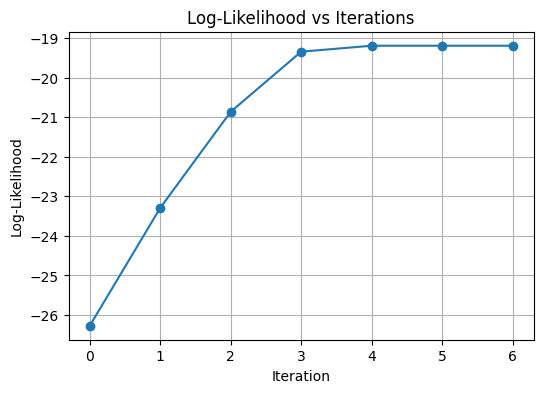

In [ ]:
# 1. Instantiate the PLSI3Way class
n_topics = 3 # Chosen number of topics
plsi_3way = PLSI3Way(n_users=n_users, n_docs=n_docs, n_words=n_words, n_topics=n_topics, random_state=42)

# 2. Call the fit method
plsi_3way.fit(indexed_triplets, counts)

# 3. Plot the likelihood
plsi_3way.plot_likelihood()

In [ ]:
from sklearn.model_selection import train_test_split

# Convert to numpy arrays for easier splitting
indexed_triplets_np = np.array(indexed_triplets)
counts_np = np.array(counts)

# 1. Split the prepared data into training and testing sets.
# We split the unique triplets. The counts for these triplets will be used for training/testing.
# Let's use an 80/20 split.
train_indices, test_indices = train_test_split(
    np.arange(len(indexed_triplets_np)),
    test_size=0.2,
    random_state=42
)

train_triplets = indexed_triplets_np[train_indices]
train_counts = counts_np[train_indices]

test_triplets = indexed_triplets_np[test_indices]
test_counts = counts_np[test_indices]

print(f"Training set size: {len(train_triplets)} triplets")
print(f"Testing set size: {len(test_triplets)} triplets")

# 2. Re-train the plsi_3way model on the training data.
# Re-instantiate to ensure fresh initialization
plsi_3way_trained = PLSI3Way(n_users=n_users, n_docs=n_docs, n_words=n_words, n_topics=n_topics, random_state=42)
plsi_3way_trained.fit(train_triplets, train_counts)

# 3. Implement a function to calculate the held-out log-likelihood on the testing set.
def calculate_heldout_log_likelihood(model, triplets, counts):

    log_likelihood = 0
    for i, (u, d, w) in enumerate(triplets):
        # Calculate P(u, d, w) = sum_z P(u|z) * P(d|z) * P(w|z) * P(z)
        # Ensure indices are within bounds (important for test set)
        if u < model.n_users and d < model.n_docs and w < model.n_words:
             P_udw = (model.P_u_z[:, u] * model.P_d_z[:, d] * model.P_w_z[:, w] * model.P_z).sum()
             # Add a small epsilon for numerical stability before taking log
             log_likelihood += counts[i] * np.log(P_udw + 1e-12)
        else:
             print(f"Warning: Test triplet {(u,d,w)} contains unseen index. Skipping or assigning low probability.")
             # Assign a very small log probability to represent unseen data
             log_likelihood += counts[i] * np.log(1e-12) # Assign log probability of a very small number

    return log_likelihood

# 4. Calculate and print the held-out log-likelihood.
heldout_ll = calculate_heldout_log_likelihood(plsi_3way_trained, test_triplets, test_counts)
print(f"\nHeld-out log-likelihood on the test set: {heldout_ll:.4f}")


Training set size: 6 triplets
Testing set size: 2 triplets
Iteration 0, log-likelihood: -18.8751
Iteration 5, log-likelihood: -12.5749
✅ Converged at iteration 6
Training complete.

Held-out log-likelihood on the test set: -55.2620


In [ ]:

print(f"Held-out log-likelihood: {heldout_ll:.4f}")

# 2. Inspect the top words, users, and documents for each topic.
print("\nAnalyzing topics:")
# Use the original labels for interpretability
plsi_3way_trained.topic_words(n_top_words=plsi_3way_trained.n_words, vocab=words)
plsi_3way_trained.topic_users(n_top_users=plsi_3way_trained.n_users, user_labels=users)
plsi_3way_trained.topic_docs(n_top_docs=plsi_3way_trained.n_docs, doc_labels=docs)


Held-out log-likelihood: -55.2620

Analyzing topics:
Topic 1 (P(z)=0.2857): grape cherry apple banana
Topic 2 (P(z)=0.5714): apple cherry grape banana
Topic 3 (P(z)=0.1429): cherry grape apple banana
Topic 1: Top users: user3 user2 user1
Topic 2: Top users: user1 user2 user3
Topic 3: Top users: user2 user3 user1
Topic 1: Top documents: docC docB docA
Topic 2: Top documents: docA docB docC
Topic 3: Top documents: docB docC docA
